In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json
df = pd.read_csv('posts_details_haddad.tsv', '\t')

In [14]:
df.columns = ['Id', 'Data', 'Likes', 'Angry', 'Shares']

In [15]:
df.dtypes

Id        object
Data      object
Likes      int64
Angry      int64
Shares     int64
dtype: object

In [16]:
df["date_time"] = pd.to_datetime(df['Data'])

In [17]:
x = df["date_time"]
y = df.Shares

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.scatter(x, y)
    ax.margins(x=0, y=0)

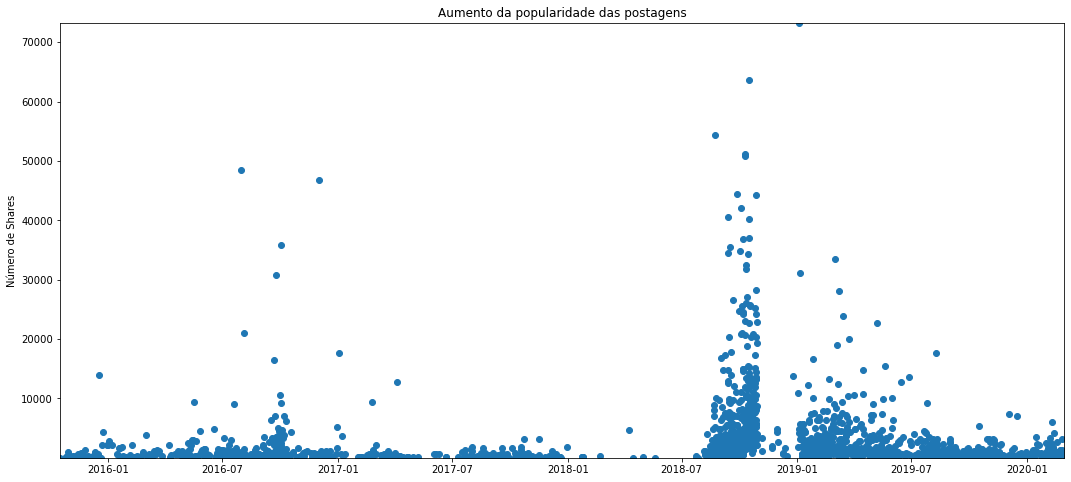

In [18]:
############## Gráfico com a distribuição do número de compartilhamentos ao longo do período #################
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
plot(x, y, ax, 'Aumento da popularidade das postagens', 'Número de Shares')

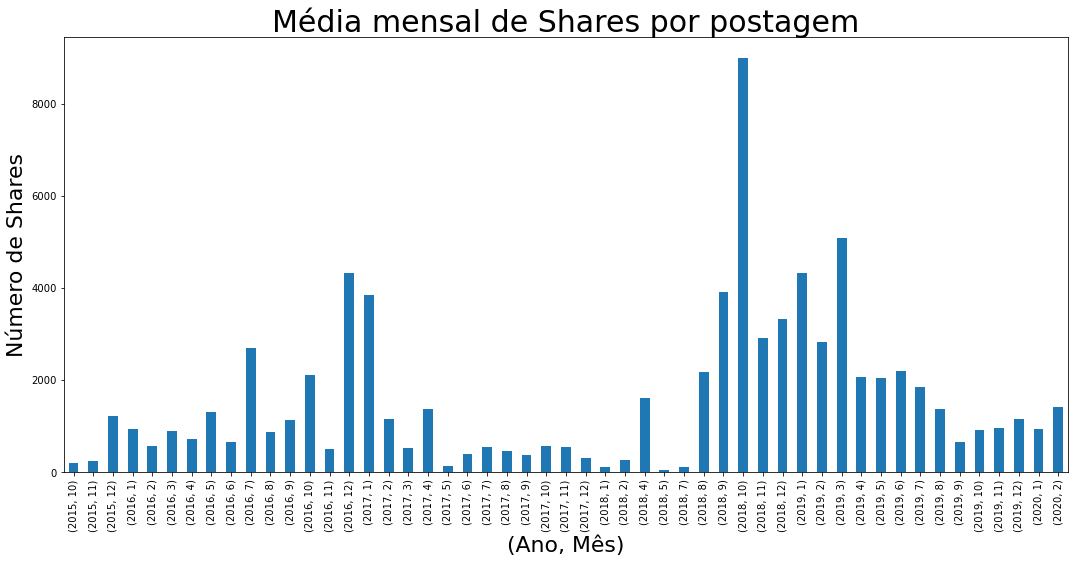

In [19]:
############# Gráfico com o número de shares médio mensal #################
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Shares"].mean()
axes = group_by_month.plot(kind='bar')
axes.set_title('Média mensal de Shares por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de Shares',fontsize=22)
plt.show()

fig = axes.get_figure()
fig.savefig('media_shares.jpg')

In [20]:
##################### Identificação das postagens que tiveram maior número de compartilhamentos ###################
tsv_file_path = 'posts_details_comments_%s.tsv' % ('haddad')
post_ids = []
dates = []
post_txt = []
num_likes = []
num_angry = []
num_shares = []
column_names = []

with open(tsv_file_path) as tsv_file:
    header = tsv_file.readline()
    column_names = header.strip().split('\t') 
    for line in tsv_file:
        elements = line.strip().split('\t') 
        post_ids.append(elements[0])
        dates.append(elements[1])
        num_likes.append(int(elements[3]))
        num_angry.append(int(elements[4]))
        num_shares.append(int(elements[5]))        
        try:
            post_txt.append(json.loads(elements[2]))       
        except:
            post_txt.append('')
            
df_comments = pd.DataFrame(list(zip(post_ids, dates, post_txt, num_likes, num_angry, num_shares)), 
               columns =column_names)

In [21]:
df_comments.columns = ['Id', 'Data', 'Message', 'Number of likes', 'Number of angry', 'Number of shares']
sorted_df = df_comments.sort_values('Number of shares', ascending=False)
sorted_df.head(20)

,Id,Data,Message,Number of likes,Number of angry,Number of shares
633,904277726319518_2110110905736188,2019-01-03T18:25:50+0000,Relendo o maior educador brasileiro com a cami...,101848,227,73245
765,904277726319518_770642973267313,2018-10-15T16:50:00+0000,Entenda porque Bolsonaro não quer debater comigo.,15022,323,63574
1150,904277726319518_237586120237229,2018-08-23T17:51:02+0000,Nossa campanha #LulaPresidente está tomando co...,72908,389,54395
815,904277726319518_1975348815879065,2018-10-09T18:29:01+0000,Vamos comparar projetos? O nosso é bem diferen...,38143,4310,51202
812,904277726319518_1382129525223236,2018-10-10T00:30:00+0000,Com o projeto Meu Emprego de Novo vamos gerar ...,61159,655,50880
1685,904277726319518_1123544887726133,2016-07-29T21:22:10+0000,"ÁFRICA NAS ESCOLAS\n\nDurante 35 anos, a UNESC...",31319,14,48526
1393,904277726319518_1236765659737388,2016-12-01T21:33:48+0000,"Ontem ganhamos o ""Desafio dos Prefeitos"", orga...",45464,13,46735
934,904277726319518_2054916448156124,2018-09-26T12:52:44+0000,"Estivemos em Petrolina, em Pernambuco, e Juaze...",25574,79,44352
669,904277726319518_2008373709243242,2018-10-26T22:19:14+0000,"A onda da virada tomou conta de Salvador (BA),...",47102,117,44221
859,904277726319518_340215979884292,2018-10-02T21:54:02+0000,Assista o resumo de como foi o nosso grande at...,66226,250,41994


In [22]:
##################### Identificação das postagens que receberam mais reações negativas ###################
sorted_df = df_comments.sort_values('Number of angry', ascending=False)
sorted_df.head(20)

,Id,Data,Message,Number of likes,Number of angry,Number of shares
574,904277726319518_2141636845916927,2019-01-25T11:28:25+0000,Mais uma vergonha internacional: Damares acusa...,19389,11430,10118
422,904277726319518_2241338135946797,2019-03-31T20:03:17+0000,Bolsonaro rasga Constituição de 1988 e divulga...,19709,10709,10520
595,904277726319518_2130298060384139,2019-01-17T15:40:38+0000,O Jr. deu uma fraquejada: Flávio Bolsonaro ped...,23339,9515,12302
431,904277726319518_2225503914196886,2019-03-21T13:46:46+0000,Olha a relação de causalidade que este gênio d...,9889,7108,10457
798,904277726319518_541196666321680,2018-10-11T15:32:25+0000,Fernando Haddad fala ao vivo para rádios da Ba...,14463,6581,7265
615,904277726319518_2118908728189739,2019-01-09T19:29:09+0000,"Ibama anula multa ambiental de Bolsonaro, apli...",8470,6358,5697
545,904277726319518_2158029657610979,2019-02-04T20:57:50+0000,Guarda civil mata ciclista com três tiros após...,6368,5797,6318
439,904277726319518_2222452741168670,2019-03-19T12:29:59+0000,Bolsonaro diz que maioria de imigrantes não te...,16384,5703,7182
387,904277726319518_2262185507195393,2019-04-14T14:07:09+0000,Bolsonaro desautoriza operação em andamento do...,4959,5585,10732
655,904277726319518_2128565730805086,2018-10-27T21:36:09+0000,AO VIVO | Haddad responde perguntas da populaç...,20934,5558,14422


In [12]:
##################### Análise  sobre os principais temas que recebem ódio ###################
#As publicações com mais reações negativas são as que o Haddad sita o Bolsonaro e os aliados do mesmo